In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import utilities as ut
import satellite_analysis as sa

In [2]:
DATA_DIR = '../data/'

m12b_halo = ut.io.file_hdf5(DATA_DIR+'m12b_host_halo_history.hdf5')
m12b_disc = ut.io.file_hdf5(DATA_DIR+'m12b_host_disc_history.hdf5')


# in utilities.io.file_hdf5():
  reading file:  data/m12b_host_halo_history.hdf5
    host.index | int32, shape = (601,)
    host.mass | float32, shape = (601,)
    host.position | float32, shape = (601, 3)
    host.radius | float32, shape = (601,)
    host.scale.radius | float32, shape = (601,)
    host.velocity | float32, shape = (601, 3)
    redshift | float64, shape = (601,)
    snapshot | int32, shape = (601,)
    time | float64, shape = (601,)

# in utilities.io.file_hdf5():
  reading file:  data/m12b_host_disc_history.hdf5
    position | float32, shape = (601, 1, 3)
    redshift | float64, shape = (601,)
    rotation | float32, shape = (601, 1, 3, 3)
    snapshot | int32, shape = (601,)
    time | float64, shape = (601,)
    velocity | float32, shape = (601, 1, 3)


In [3]:
def plot_halo_disc_diff(m12_halo_info, m12_disc_info, m12_name):
    lmc_peris = {'m12b': 385, 'm12c':551, 'm12f':463, 'm12w':359}
    lmc_infalls = {'m12b': 353, 'm12c':503, 'm12f':420, 'm12w':335}
    
    fig4, ax4 = plt.subplots(1,1,figsize=(6,5))
    # normalize time to LMC t_peri
    t_peri = sa.satellite_io.convert_snapshot_to_time(lmc_peris[m12_name], time_kind='time')
    # plot LMC first infall
    t_infall = sa.satellite_io.convert_snapshot_to_time(lmc_infalls[m12_name], time_kind='time')
    #ax.vlines(t_infall - t_peri, 0, 100, alpha=0.5, linestyles='--')
    ax4.vlines(t_infall, -150, 150, alpha=0.5, linestyles='--', color='k')
    ax4.vlines(t_peri, -150, 150, alpha=0.5, linestyles=':', color='k')
    # get a snapshot 100 snapshots before LMC infall, to get distance change relative to
    i = lmc_infalls[m12_name] - 100
    plt.plot(m12_disc_info['time'][i:], m12_disc_info['velocity'][i:,0,0]-m12_disc_info['velocity'][i,0,0],
        label=r'$v_x$')
    plt.plot(m12_disc_info['time'][i:], m12_disc_info['velocity'][i:,0,1]-m12_disc_info['velocity'][i,0,1],
        label=r'$v_y$')
    plt.plot(m12_disc_info['time'][i:], m12_disc_info['velocity'][i:,0,2]-m12_disc_info['velocity'][i,0,2],
        label=r'$v_z$')
    plt.ylim((-150,150))
    plt.legend(title=m12_name)
    plt.ylabel('COM velocity [km/s]')
    plt.xlabel('Time [Gyr]')
    ax4.tick_params(axis='both', which='major', labelsize=20)
    plt.show()

    return fig4

def plot_halo_disc_center_distance(m12_halo_info, m12_disc_info, m12_name):
    lmc_peris = {'m12b': 385, 'm12c':551, 'm12f':463, 'm12w':359}
    lmc_infalls = {'m12b': 353, 'm12c':503, 'm12f':420, 'm12w':335}

    fig = plt.figure(figsize=(6,4.8), tight_layout=True)
    # normalize time to LMC t_peri
    t_peri = sa.satellite_io.convert_snapshot_to_time(lmc_peris[m12_name], time_kind='time')
    # plot LMC first infall
    t_infall = sa.satellite_io.convert_snapshot_to_time(lmc_infalls[m12_name], time_kind='time')
    plt.vlines(t_infall, -150, 150, alpha=0.5, linestyles='--', color='k')
    plt.vlines(t_peri, -150, 150, alpha=0.5, linestyles=':', color='k')
    
    abs_dist = ut.coordinate.get_distances(m12_halo_info['host.position'], m12_disc_info['position'][:,0,:], total_distance=True)
    plt.plot(m12_halo_info['time'][:-2], abs_dist[:-2])
    #print(abs_dist)
    plt.ylim((0,20))
    plt.legend(title=m12_name, loc=3)
    plt.ylabel('Halo-disc center offset [kpc]', fontsize=16)
    plt.xlabel('Time [Gyr]', fontsize=16)
    plt.xlim((4,14))
    plt.show()

    return fig


No handles with labels found to put in legend.


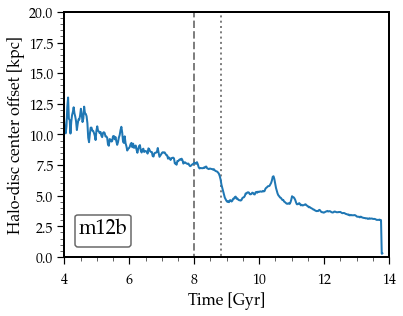

In [4]:
b_dist = plot_halo_disc_center_distance(m12b_halo, m12b_disc, m12_name='m12b')
#b_dist.savefig('/Users/jsamuel/Desktop/m12b_center_diff.pdf', dpi=300)

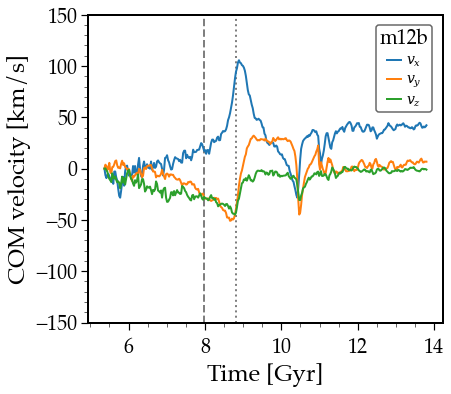

In [5]:
b_vel = plot_halo_disc_diff(m12b_halo, m12b_disc, m12_name='m12b')
#b_vel.savefig('/Users/jsamuel/Desktop/m12b_host_dic_motion.png', dpi=100)